In [1]:
#Import Library
import json
import networkx
import xlwt
from xlwt import Workbook
import networkx as nx

#Read the file
with open("commitsF.json", "r",encoding="UTF-8") as read_file:
    data = json.load(read_file)
    
#print(data)

# The following cell retrieves all the meta data for every commit in the eclipse/che repository 

In [2]:
coms = []

for i in range(len(data)):
    coms.append(data[i]["commit"])
    
print(coms)


[{'author': {'name': 'Dmytro Nochevnov', 'email': 'dnochevn@redhat.com', 'date': '2019-10-22T15:39:59Z'}, 'committer': {'name': 'GitHub', 'email': 'noreply@github.com', 'date': '2019-10-22T15:39:59Z'}, 'message': 'Log and fix workaround to Java LS server initialization failure (#14945)\n\nSigned-off-by: Dmytro Nochevnov <dnochevn@redhat.com>', 'tree': {'sha': '506d35db0a3d4b503e3b0c4a7ecaf6036a86f740', 'url': 'https://api.github.com/repos/eclipse/che/git/trees/506d35db0a3d4b503e3b0c4a7ecaf6036a86f740'}, 'url': 'https://api.github.com/repos/eclipse/che/git/commits/2629f8a15992085a89687194c382a4a618ca086b', 'comment_count': 0, 'verification': {'verified': True, 'reason': 'valid', 'signature': '-----BEGIN PGP SIGNATURE-----\n\nwsBcBAABCAAQBQJdryLPCRBK7hj4Ov3rIwAAdHIIAAJWSg/ekw6/nXEmoPXFaI/L\niQu28v7dHKWU+5yg5WzlR+S1rmywX3eSIhCaoDUHkCfz/oqJJ6o/efRA7G6pYH47\nXF8qbm+KQjWWom+yUFEK2FNxxZwjaST2roDKT4a4W/nQrBFtY3e4nLoRWukfKlmI\nXXpGCmxtrdErwKGcwasvdEZJUZ/Z3rgQY1TF2GZ/VXJIkw0S4MnfoZnD2N/YwWF6\nrH

# The following cell retrieves the author data for every commit in the eclipse/che repository

In [3]:
coms2= []

for i in range(len(coms)):
    coms2.append(coms[i]["author"])
                 
print(coms2[1])

{'name': 'Max Shaposhnik', 'email': 'mshaposh@redhat.com', 'date': '2019-10-21T16:54:47Z'}


# The following cell retrieves the committer data for every commit in the eclipse/che repository

In [4]:
auts = []
for i in range(len(coms)):
    auts.append(coms[i]["committer"])
print(auts[1])

{'name': 'GitHub', 'email': 'noreply@github.com', 'date': '2019-10-21T16:54:47Z'}


# The following cell generates an array of all committer email addresses

In [5]:
committers = []
for i in range(len(coms2)):
    committers.append(coms2[i]["email"])
print(committers)

['dnochevn@redhat.com', 'mshaposh@redhat.com', 'amisevsk@redhat.com', 'mmusiien@redhat.com', 'skabashnyuk@users.noreply.github.com', 'mshaposh@redhat.com', 'mmusiien@redhat.com', 'skabashnyuk@users.noreply.github.com', 'dnochevn@redhat.com', 'vparfono@redhat.com', 'vparfono@redhat.com', 'mmorhun@redhat.com', 'tg82490@gmail.com', 'iokhrime@redhat.com', 'skabashnyuk@users.noreply.github.com', 'dnochevn@redhat.com', 'oshmarai@redhat.com', 'sparkoo@users.noreply.github.com', 'sparkoo@users.noreply.github.com', 'oorel@redhat.com', 'oshmarai@redhat.com', 'oandriie@redhat.com', 'oshmarai@redhat.com', 'mshaposh@redhat.com', 'sleshche@redhat.com', 'skabashnyuk@users.noreply.github.com', 'sleshche@redhat.com', 'sleshche@redhat.com', 'sleshche@redhat.com', 'okurinny@redhat.com', 'ivinokur@redhat.com', 'mmusiien@redhat.com', 'mshaposh@redhat.com', 'oorel@redhat.com', 'mshaposh@redhat.com', 'fbenoit@redhat.com', 'mshaposh@redhat.com', 'amisevsk@redhat.com', 'amisevsk@redhat.com', 'vparfono@redhat.c

# The following cell generates an array of all authors email addresses

In [6]:
authors = []
for i in range(len(coms2)):
    authors.append(auts[i]["email"])

#print(authors)  

# The following cell changes noreply@github.com to the committers email address so the emails can be compared to check if an edge should exist

In [7]:
#this cell changes noreply@github.com to the committers email address so that the following cell knows it
#is not an interaction between 2 developers

for i in range(len(authors)):
    if authors[i][:-1] == "noreply@github.co":
        authors[i] = committers[i]
        
#print(authors)

# The following cell compares the email address of the author and the committer and returns true if same
# A result of "False" indicates an edge should exist between the two authors

In [8]:
# #This cell compares the email address of the author and the committer and returns true if same
# #A return value of false at index x indicates there should be an edge between the two developers found at authors[x] and committers[x]
boolean = []
for i in range(len(committers)):
    boolean.append((committers[i]==(authors[i]),(committers[i]),(authors[i])))
#print(boolean)

# The following cell generates tuples of the email addresses of all the developers that have worked together 

In [9]:
##This cell is a modified version of the one above it to format the emails properly for deliverable 1

# #This cell compares the email address of the author and the committer and returns true if same
#there should be an edge between the two developers found at authors[x] and committers[x]
boo = []
for i in range(len(boolean)):
    if boolean[i][0]==False:
        boo.append(((boolean[i][1]),(boolean[i][2])))
#print(boo)
boo = list(set(boo))
#for i in range(len(boo)):
    #print(boo[i])


# The following cell removes duplicates in author set and committer set
# The two are then converted back into an array and combined to create the masterSet of all developers that will be represented in the graph

In [10]:
authSet = list(set(authors))
commSet = list(set(committers))
masterSet= list(set(commSet+authSet))
print(masterSet)

['12269156+akorneta@users.noreply.github.com', 'monaka@monami-ya.com', 'gytis@redhat.com', 'dshah@redhat.com', 'vsvydenko@codenvy.com', 'rnikitenko@redhat.com', 'gazarenkov@codenvy.com', '36728491+gausa@users.noreply.github.com', 'fbenoit@codenvy.com', 'tareq.sha@gmail.com', 'gazarenkov@gmail.com', 'kaloyan-raev@users.noreply.github.com', 'fabs@clark.de', 'vgulyy@redhat.com', 'sskoryk@redhat.com', 'rnikitenko@codenvy.com', 'sergey.kuperman@sap.com', 'mvala@redhat.com', 'alex.tugarev@googlemail.com', 'ilyabuziuk@gmail.com', 'skabashniuk@redhat.com', 'son.nguyen@softwareag.com', 'evidolob@codenvy.com', 'vparfono@redhat.com', 'yvoievod@redhat.com', 'david@outeredgeuk.com', 'agaragatyi@codenvy.com', 'vzhukovskii@codenvy.com', 'lee@fenlan.uk', 'lkrejci@redhat.com', 'amisevsk@redhat.com', 'targetjump@gmail.com', 'elon.mallin@gmail.com', 'amrecio@gmail.com', 'bmicklea@redhat.com', 'vguliy@codenvy.com', 'kkanova@redhat.com', 'qurben@users.noreply.github.com', 'ljelinko@redhat.com', 'rhopp@redh

# The following cell generates a list of tuples containing the indices of developers that share an edge

In [17]:
edges = []

for i in range(len(boolean)):
    if boolean[i][0] == False:
        edges.append((masterSet.index(boolean[i][1]),(masterSet.index(boolean[i][2]))))
        
#edges2 does not have repeated values
edges2 = list(set(edges))

# The following cell adds the edges to the graph and draws the graph

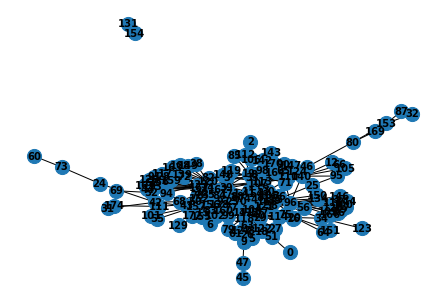

In [18]:
G = nx.Graph()
G.add_edges_from(edges2)
nx.draw(G, node_size=200, with_labels=True, font_size=10, font_weight='bold')

# The following three cells compute degree centrality, closeness centrality, and betweenness centrality of the graph

In [13]:
dc=nx.degree_centrality(G)

In [14]:
cc=nx.closeness_centrality(G)

In [15]:
bc=nx.betweenness_centrality(G)

# The following cell generates an excel file with the nodes (emails) and their three centrality measures as calculated in the previous three cells

In [16]:
wb = Workbook()

d3 = wb.add_sheet('Deliverable 3', cell_overwrite_ok=True)

for i in range(len(masterSet)):
    d3.write(i, 0, masterSet[i])
for id,val in enumerate(dc):
    d3.write(i, 1, val)
for id,val in enumerate(bc):
    d3.write(i, 2, val)
for id,val in enumerate(cc):
    d3.write(i, 3, val)

    
wb.save('Deliverable3SNA.xls')